# EDA on Chase Bank Branch Deposits

# Content

This dataset includes a record for every branch of Chase Bank in the United States, including the branch's name and number, date established as a bank office and (if applicable) acquired by JP Morgan Chase, physical location as street address, city, state, zip, and latitude and longitude coordinates, and the amount deposited at the branch (or the institution, for the bank's main office) between July 1 and June 30, 2016, in US dollars.


# Data Source

The location data was scraped from the Chase Bank website. The deposit data was compiled from the Federal Deposit Insurance Corporation's annual Summary of Deposits reports. This perticular data was taken from the Kaggle Link :- https://www.kaggle.com/chasebank/bank-deposits

In [1]:
import numpy as np # linear algebra
import pandas_profiling
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #for Plotting
%matplotlib inline
import seaborn as sns #for graphing
import collections
local_path = "C:/Users/Aravind/Desktop/UpX Academy/Data Science Track - 01/PROJECTS TO BE DOING/Project Datasets/Project_Bank/Chase bank-deposits/database.csv"
input_data = pd.read_csv(local_path)                           #load CSV file from local directory
input_data.head()                                         # Preview the first 5 lines of the loaded data

,Institution Name,Main Office,Branch Name,Branch Number,Established Date,Acquired Date,Street Address,City,County,State,Zipcode,Latitude,Longitude,2010 Deposits,2011 Deposits,2012 Deposits,2013 Deposits,2014 Deposits,2015 Deposits,2016 Deposits
0,JPMorgan Chase Bank,1,JPMorgan Chase Bank Main Office,0,01/01/1824,NaN,1111 Polaris Parkway,Columbus,Delaware,OH,43240,40.14453,-82.99115,633131000.0,743268000.0,832455000.0,916543000.0,1.032549e+09,1.069425e+09,1155185000
1,JPMorgan Chase Bank,0,Vernon Hills Scarsdale Branch,2,03/20/1961,NaN,676 White Plains Road,Scarsdale,Westchester,NY,10583,40.97008,-73.80670,293229.0,310791.0,325742.0,327930.0,3.277920e+05,3.414750e+05,381558
2,JPMorgan Chase Bank,0,Great Neck Northern Boulevard Branch,3,09/09/1963,NaN,410 Northern Boulevard,Great Neck,Nassau,NY,11021,40.77944,-73.72240,191011.0,206933.0,216439.0,237983.0,2.341830e+05,2.624550e+05,278940
3,JPMorgan Chase Bank,0,North Hartsdale Branch,4,02/19/1966,NaN,353 North Central Avenue,Hartsdale,Westchester,NY,10530,41.02654,-73.79168,87110.0,88367.0,93163.0,109659.0,1.119850e+05,1.167720e+05,140233
4,JPMorgan Chase Bank,0,Lawrence Rockaway Branch,5,01/16/1965,NaN,335 Rockaway Turnpike,Lawrence,Nassau,NY,11559,40.62715,-73.73675,172608.0,172749.0,189413.0,198445.0,2.051980e+05,2.232000e+05,235594


In [2]:
eda = pandas_profiling.ProfileReport(input_data)
eda

Number of variables,20
Number of observations,5413
Total Missing (%),1.6%
Total size in memory,845.9 KiB
Average record size in memory,160.0 B
Numeric,4
Categorical,7
Boolean,1
Date,0
Text (Unique),0
Rejected,8


In [3]:
df_chase = pd.DataFrame(input_data) 
df_chase.isnull().sum()          

Institution Name       0
Main Office            0
Branch Name            0
Branch Number          0
Established Date       0
Acquired Date       1615
Street Address         0
City                   0
County                 0
State                  0
Zipcode                0
Latitude              66
Longitude             66
2010 Deposits        740
2011 Deposits        578
2012 Deposits        329
2013 Deposits        175
2014 Deposits         56
2015 Deposits         19
2016 Deposits          0
dtype: int64

In [4]:
## Drop columns which are not required for the EDA.  
df_chase.drop(['Main Office','Branch Number','Street Address','Latitude','Longitude'], axis=1, inplace=True) 

In [5]:
df_chase['2016 Deposits'] = df_chase['2016 Deposits'].astype(float)
df_chase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5413 entries, 0 to 5412
Data columns (total 15 columns):
Institution Name    5413 non-null object
Branch Name         5413 non-null object
Established Date    5413 non-null object
Acquired Date       3798 non-null object
City                5413 non-null object
County              5413 non-null object
State               5413 non-null object
Zipcode             5413 non-null int64
2010 Deposits       4673 non-null float64
2011 Deposits       4835 non-null float64
2012 Deposits       5084 non-null float64
2013 Deposits       5238 non-null float64
2014 Deposits       5357 non-null float64
2015 Deposits       5394 non-null float64
2016 Deposits       5413 non-null float64
dtypes: float64(7), int64(1), object(7)
memory usage: 634.4+ KB


# Fill null values

In [6]:
cols = ['2010 Deposits','2011 Deposits','2012 Deposits','2013 Deposits','2014 Deposits','2015 Deposits','2016 Deposits']
df_chase[cols] = df_chase[cols].fillna(0)

In [7]:
df_chase_num = df_chase[['2010 Deposits','2011 Deposits','2012 Deposits','2013 Deposits','2014 Deposits','2015 Deposits','2016 Deposits']]
df_chase_num.isnull().sum()
df_chase.isnull().sum()

Institution Name       0
Branch Name            0
Established Date       0
Acquired Date       1615
City                   0
County                 0
State                  0
Zipcode                0
2010 Deposits          0
2011 Deposits          0
2012 Deposits          0
2013 Deposits          0
2014 Deposits          0
2015 Deposits          0
2016 Deposits          0
dtype: int64


## Q1) Where did Chase Bank customers deposit the most money last year?

### A) Most money deposited by State

In [8]:
state =  df_chase.groupby('State')['2016 Deposits'].sum().sort_values(ascending=False)
state_1 = pd.DataFrame(state)
state_2 = state_1.iloc[0:10,:]
state_2

,2016 Deposits
State,
OH,1.183589e+09
NY,5.367528e+08
TX,1.513938e+08
CA,1.189587e+08
IL,8.440550e+07
MI,4.200621e+07
AZ,3.012693e+07
FL,2.883678e+07
NJ,1.924947e+07


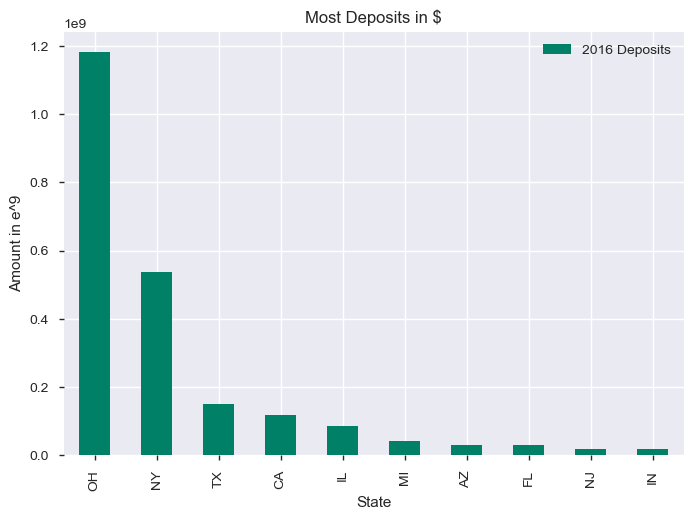

In [9]:
state_2.plot(kind ='bar', title = 'Most Deposits in $',colormap = 'summer')
plt.ylabel('Amount in e^9')
plt.show();

#### ANS:- Ohio state has most amount deposited in the Year 2016.

### B) Most money deposited by City

In [10]:
city =  df_chase.groupby('City')['2016 Deposits'].sum().sort_values(ascending=False)
city_1 = pd.DataFrame(city)
city_2 = city_1.iloc[0:10,:]
city_2

,2016 Deposits
City,
Columbus,1.165474e+09
New York City,4.549220e+08
Houston,7.442017e+07
Chicago,4.997336e+07
Dallas,3.156900e+07
Detroit,2.025068e+07
Brooklyn,1.416018e+07
Phoenix,1.215515e+07
Salt Lake City,1.035105e+07


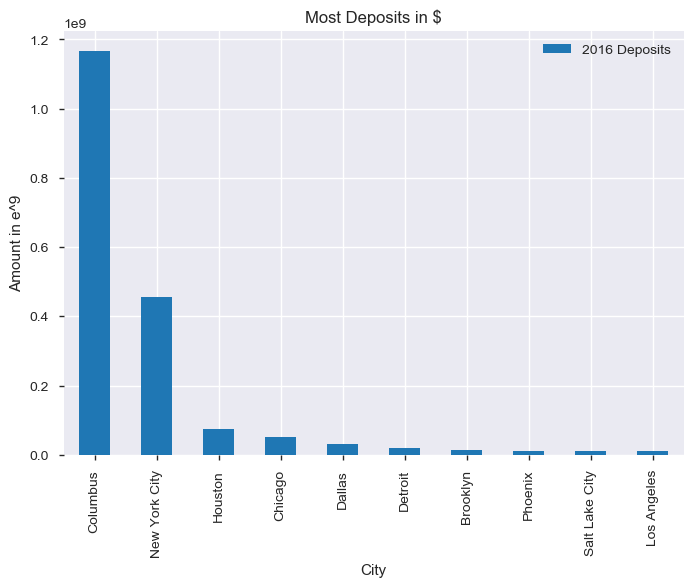

In [11]:
city_2.plot(kind ='bar', title = 'Most Deposits in $')
plt.ylabel('Amount in e^9')
plt.show();

#### ANS:- City Columbus has most amount deposited in the Year 2016.

### C) Most money deposited by County.

In [12]:
county =  df_chase.groupby('County')['2016 Deposits'].sum().sort_values(ascending=False)
county_1 = pd.DataFrame(county)
county_2 = county_1.iloc[0:10,:]
county_2

,2016 Deposits
County,
Delaware,1.156320e+09
New York,4.544063e+08
Harris,7.821389e+07
Cook,6.628701e+07
Los Angeles,4.196384e+07
Dallas,3.961928e+07
Wayne,2.505381e+07
Maricopa,2.285962e+07
Orange,1.614785e+07


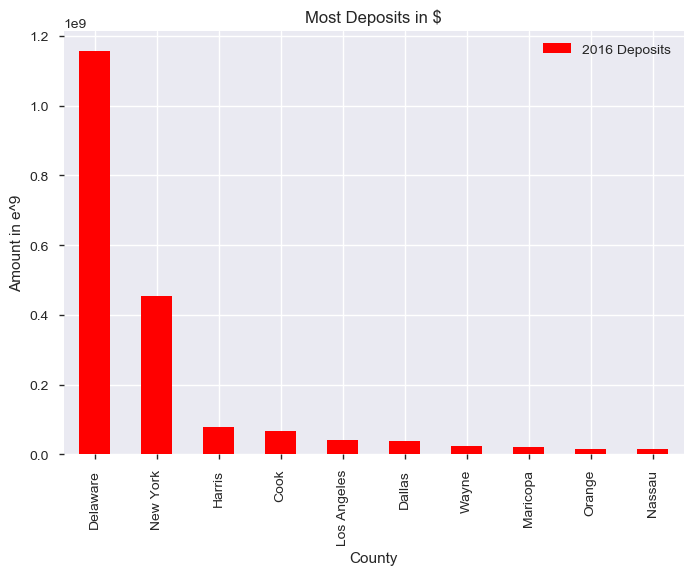

In [13]:
county_2.plot(kind ='bar', title = 'Most Deposits in $', color = 'r')
plt.ylabel('Amount in e^9')
plt.show();

#### ANS:- Delaware county has most amount deposited in the Year 2016.

### D) Most money deposited by Branch.

In [14]:
branch =  df_chase.groupby('Branch Name')['2016 Deposits'].sum().sort_values(ascending=False)
branch_1 = pd.DataFrame(branch)
branch_2 = branch_1.iloc[0:10,:]
branch_2

,2016 Deposits
Branch Name,
JPMorgan Chase Bank Main Office,1.155185e+09
Madison and 48th St Branch,3.136869e+08
Madison Ave Abd 48th St Branch,6.904479e+07
Houston Main Office,5.782058e+07
Chicago's Main Office Branch,3.653903e+07
Dallas Main Banking Center Branch,2.541479e+07
Detroit Main Branch,1.949950e+07
Empire State Branch,1.558090e+07
One Utah Branch,9.138734e+06


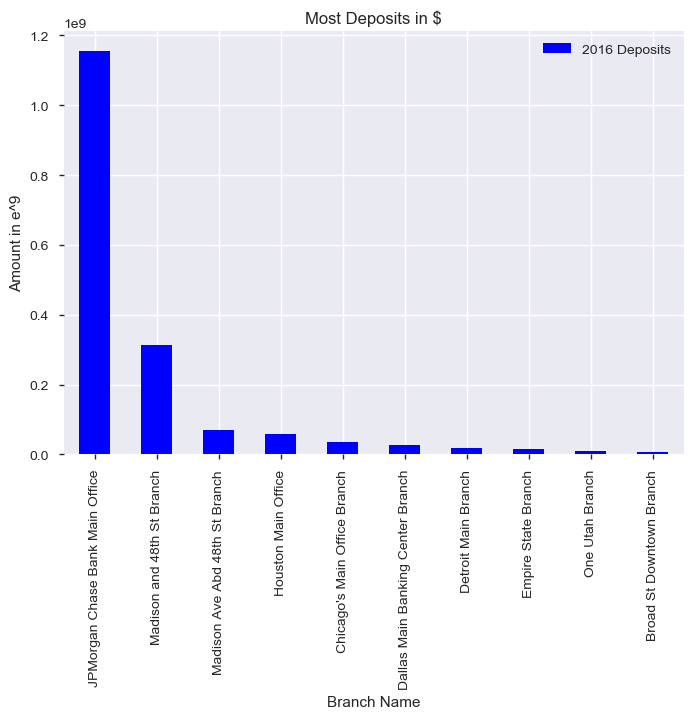

In [15]:
branch_2.plot(kind ='bar', title = 'Most Deposits in $', color = 'b')
plt.ylabel('Amount in e^9')
plt.show();

#### ANS:- JPMorgan Chase Bank Main Office has most amount deposited in the Year 2016.

### 2) Which bank branch has seen the most growth in deposits?

In [16]:
branch =  df_chase.groupby('Branch Name')['2010 Deposits','2016 Deposits'].sum()
branch_1 = branch.sort_values(['2010 Deposits','2016 Deposits'],ascending=False)
branch_1.head()

,2010 Deposits,2016 Deposits
Branch Name,,
JPMorgan Chase Bank Main Office,633131000.0,1.155185e+09
Madison and 48th St Branch,153577328.0,3.136869e+08
Madison Ave Abd 48th St Branch,45099076.0,6.904479e+07
Houston Main Office,26356388.0,5.782058e+07
Chicago's Main Office Branch,22101086.0,3.653903e+07


# Branch Distribution by Geographic Level

## A) Highest Branches by City

In [17]:
# By City 
city =  df_chase.groupby('City')['City'].count().sort_values(ascending = False)
city_1 = city.head(10)
city_1

City
New York City    154
Houston          139
Chicago          119
Brooklyn          77
Dallas            64
Los Angeles       58
Indianapolis      49
Bronx             48
Phoenix           47
San Antonio       44
Name: City, dtype: int64

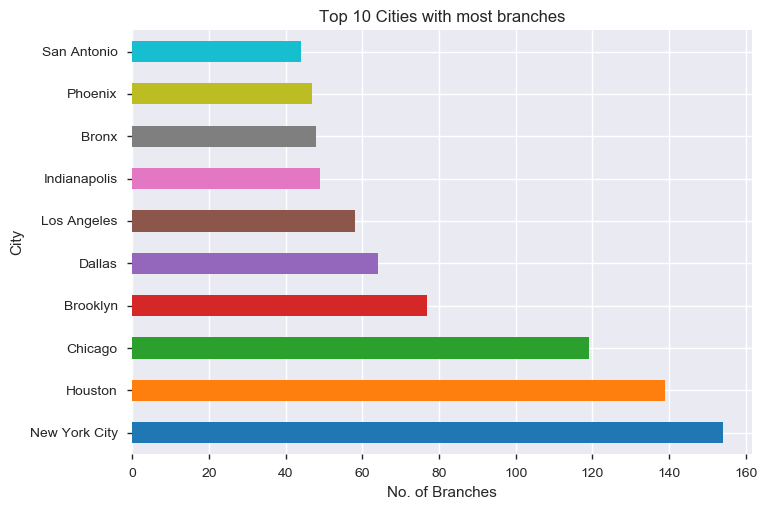

In [18]:
city_1.plot(kind ='barh', title = 'Top 10 Cities with most branches')
plt.xlabel('No. of Branches')
plt.ylabel('City')
plt.show();

## B) Highest Branches by County

In [19]:
# By County 
county =  df_chase.groupby('County')['County'].count().sort_values(ascending = False)
county_1 = county.head(10)
county_1

County
Los Angeles    298
Cook           224
Harris         179
Maricopa       174
New York       152
Orange         152
Dallas         107
Westchester     96
Suffolk         92
San Diego       92
Name: County, dtype: int64

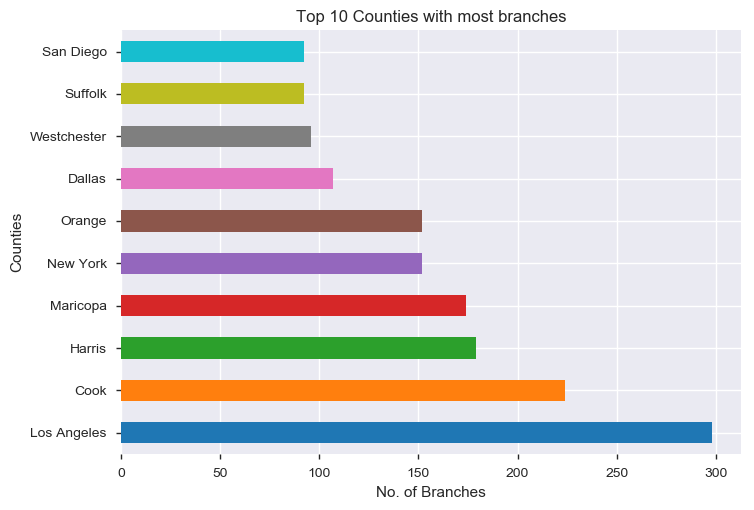

In [20]:
county_1.plot(kind ='barh', title = 'Top 10 Counties with most branches')
plt.xlabel('No. of Branches')
plt.ylabel('Counties')
plt.show();

## C) Highest Branches by State

In [21]:
# By State 
state =  df_chase.groupby('State')['State'].count().sort_values(ascending = False)
state_1 = state.head(10)
state_1

State
CA    1003
NY     764
TX     660
FL     396
IL     371
OH     285
AZ     256
MI     246
NJ     218
WA     204
Name: State, dtype: int64

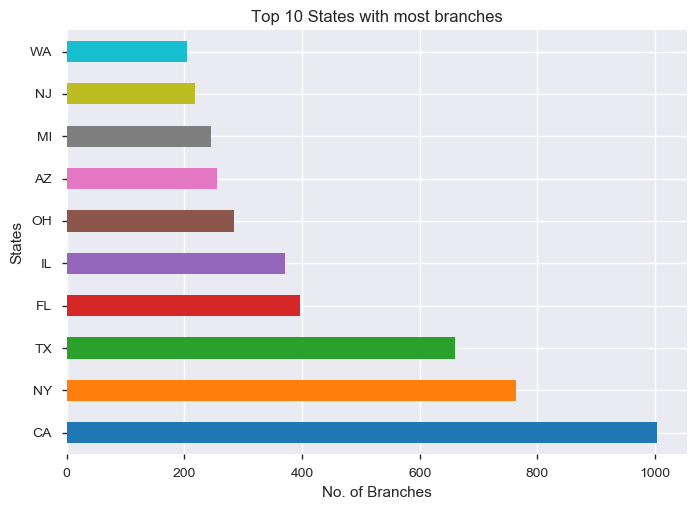

In [22]:
state_1.plot(kind ='barh', title = 'Top 10 States with most branches')
plt.xlabel('No. of Branches')
plt.ylabel('States')
plt.show();

## D) Highest Branches by Zipcode

In [23]:
# By Zipcode 
zipcode =  df_chase.groupby('Zipcode')['Zipcode'].count().sort_values(ascending = False)
zipcode_1 = zipcode.head(10)
zipcode_1

Zipcode
10022    11
10003    10
10017     8
10016     7
10019     7
60614     7
10467     6
10001     6
75093     6
10013     6
Name: Zipcode, dtype: int64

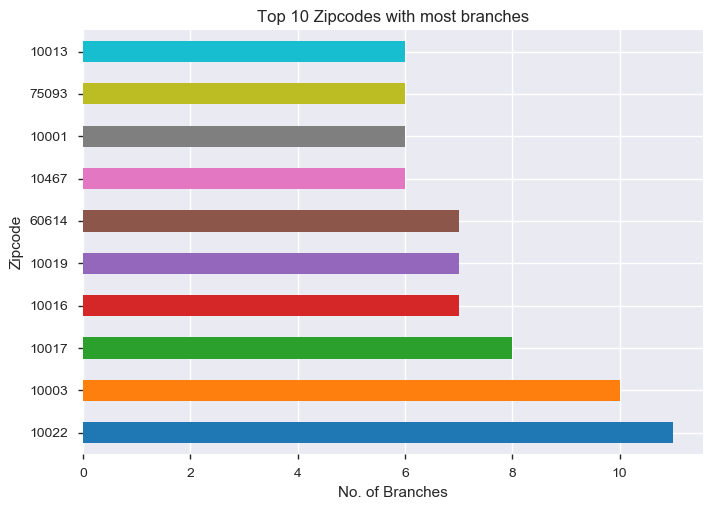

In [24]:
zipcode_1.plot(kind ='barh', title = 'Top 10 Zipcodes with most branches')
plt.xlabel('No. of Branches')
plt.ylabel('Zipcode')
plt.show();


# Total Deposits by Geographic Levels

## A) Total deposits by zipcode from 2010 to 2016

In [25]:
df_chase['total_sum'] =  df_chase[['2010 Deposits','2011 Deposits','2012 Deposits','2013 Deposits','2014 Deposits','2015 Deposits','2016 Deposits']].sum(axis = 1)
df_zip = df_chase[['Zipcode','total_sum']]
df_zip_1 = df_zip.sort_values(['total_sum'], ascending = False)
df_zip_2 = df_zip_1.head(10)
df_zip_2

,Zipcode,total_sum
0,43240,6.382556e+09
2224,10017,1.595249e+09
154,10017,5.268042e+08
395,77002,3.553584e+08
819,60603,2.519646e+08
2738,75201,1.555127e+08
1401,48226,1.004864e+08
2138,43215,4.566568e+07
4639,10036,3.978331e+07
1234,85004,3.952448e+07


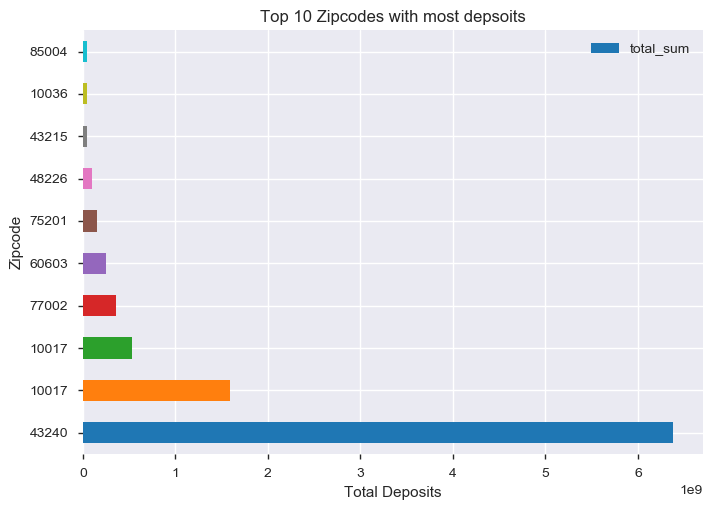

In [26]:
df_zip_2.plot(x = 'Zipcode', y = 'total_sum', kind ='barh', title = 'Top 10 Zipcodes with most depsoits')
plt.xlabel('Total Deposits')
plt.ylabel('Zipcode')
plt.show();

## B) Total deposits by City from 2010 to 2016

In [27]:
df_city = df_chase[['City','total_sum']]
df_city_1 = df_city.sort_values(['total_sum'], ascending = False)
df_city_2 = df_city_1.head(10)
df_city_2

,City,total_sum
0,Columbus,6.382556e+09
2224,New York City,1.595249e+09
154,New York City,5.268042e+08
395,Houston,3.553584e+08
819,Chicago,2.519646e+08
2738,Dallas,1.555127e+08
1401,Detroit,1.004864e+08
2138,Columbus,4.566568e+07
4639,New York City,3.978331e+07
1234,Phoenix,3.952448e+07


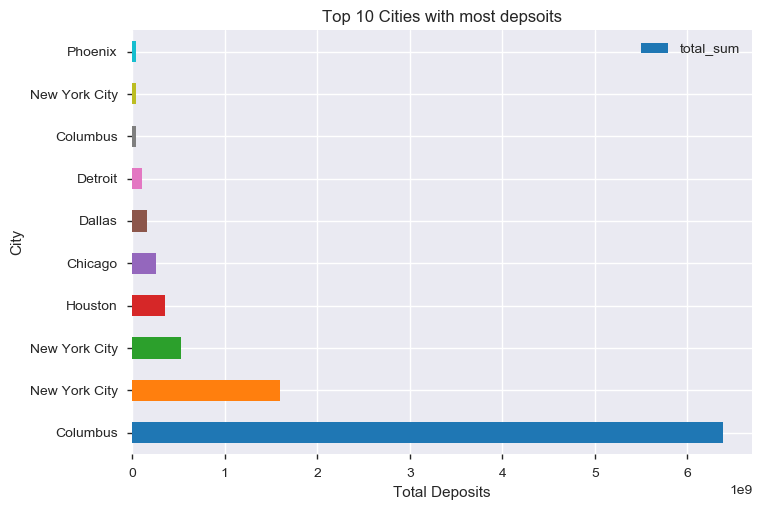

In [28]:
df_city_2.plot(x = 'City', y = 'total_sum', kind ='barh', title = 'Top 10 Cities with most depsoits')
plt.xlabel('Total Deposits')
plt.ylabel('City')
plt.show();

## C) Total deposits by Branch from 2010 to 2016

In [29]:
df_branch = df_chase[['Branch Name','total_sum']]
df_branch_1 = df_branch.sort_values(['total_sum'], ascending = False)
df_branch_2 = df_branch_1.head(10)
df_branch_2

,Branch Name,total_sum
0,JPMorgan Chase Bank Main Office,6.382556e+09
2224,Madison and 48th St Branch,1.595249e+09
154,Madison Ave Abd 48th St Branch,5.268042e+08
395,Houston Main Office,3.553584e+08
819,Chicago's Main Office Branch,2.519646e+08
2738,Dallas Main Banking Center Branch,1.555127e+08
1401,Detroit Main Branch,1.004864e+08
2138,Broad St Downtown Branch,4.566568e+07
4639,Fifth Avenue & 44th Street Banking Center Branch,3.978331e+07
1234,Chase Tower Branch,3.952448e+07


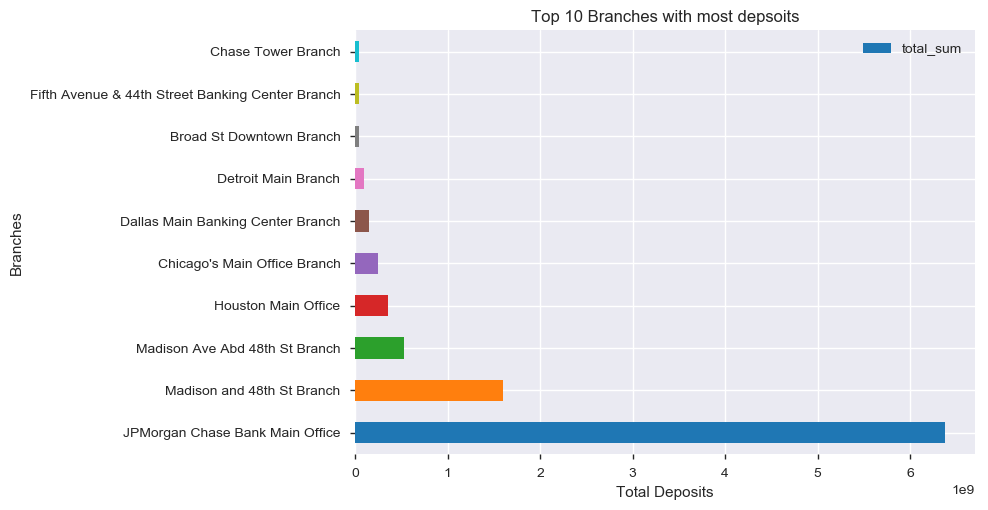

In [30]:
df_branch_2.plot(x = 'Branch Name', y = 'total_sum', kind ='barh', title = 'Top 10 Branches with most depsoits')
plt.xlabel('Total Deposits')
plt.ylabel('Branches')
plt.show();

## D) Total deposits by County from 2010 to 2016

In [31]:
df_county = df_chase[['County','total_sum']]
df_county_1 = df_county.sort_values(['total_sum'], ascending = False)
df_county_2 = df_county_1.head(10)
df_county_2

,County,total_sum
0,Delaware,6.382556e+09
2224,New York,1.595249e+09
154,New York,5.268042e+08
395,Harris,3.553584e+08
819,Cook,2.519646e+08
2738,Dallas,1.555127e+08
1401,Wayne,1.004864e+08
2138,Franklin,4.566568e+07
4639,New York,3.978331e+07
1234,Maricopa,3.952448e+07


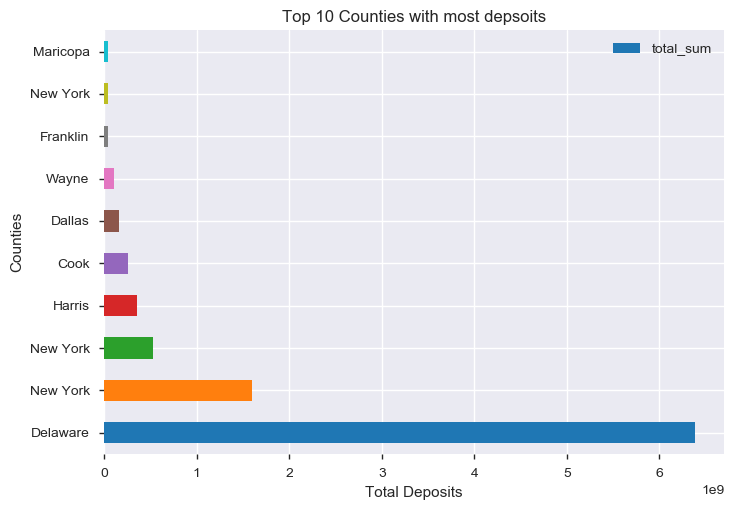

In [32]:
df_county_2.plot(x = 'County', y = 'total_sum', kind ='barh', title = 'Top 10 Counties with most depsoits')
plt.xlabel('Total Deposits')
plt.ylabel('Counties')
plt.show();

## E) Total deposits by State from 2010 to 2016

In [33]:
df_state = df_chase[['State','total_sum']]
df_state_1 = df_state.sort_values(['total_sum'], ascending = False)
df_state_2 = df_state_1.head(10)
df_state_2

,State,total_sum
0,OH,6.382556e+09
2224,NY,1.595249e+09
154,NY,5.268042e+08
395,TX,3.553584e+08
819,IL,2.519646e+08
2738,TX,1.555127e+08
1401,MI,1.004864e+08
2138,OH,4.566568e+07
4639,NY,3.978331e+07
1234,AZ,3.952448e+07


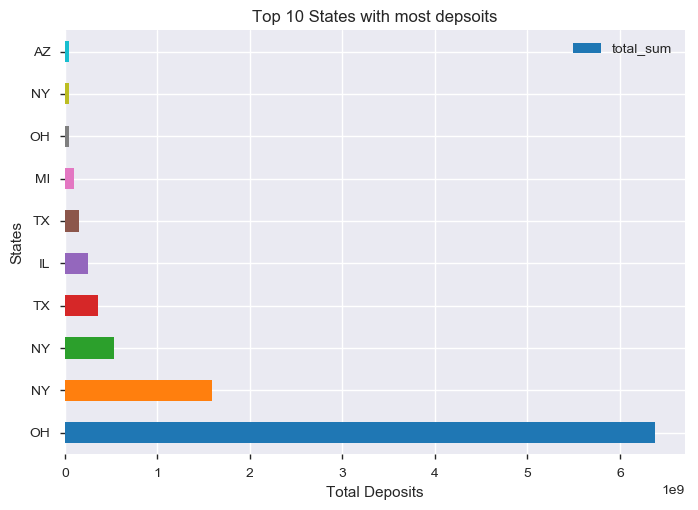

In [34]:
df_state_2.plot(x = 'State', y = 'total_sum', kind ='barh', title = 'Top 10 States with most depsoits')
plt.xlabel('Total Deposits')
plt.ylabel('States')
plt.show();